In [130]:
# code functions
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(100)
sampleQuantity = 100


class Blotto():
    def __init__(self):
        self.population = []
        for strat in customStrats: #load custom strategies first
            self.population.append([0, strat])


    def addStratsBeta(self, a, b, stratCopies): # a and b are parameters for the beta distribution
        '''
        Add a specified number of strategies to the population, determined by sampling
        the beta distribution
        '''
        for i in range(stratCopies):
            strat=np.array([0 for i in range(10)]) #initialise a strategy with all zeroes for each of the 10 castles
            for i in range(sampleQuantity): 
                index = int(np.around((np.interp(np.random.beta(a,b),[0,1],[0,9]))))
                #sample beta distribution returns range [0...1.0], interpolate to [0...9], mapping to castle
                strat[index]+=1 #increase tally for respective castle

            strat = strat/sum(strat)*100 #normalise distribution to 10 points
            strat = np.around(strat) #round off distribution

            if sum(strat)<100:
                for i in range(int(100-sum(strat))):
                    strat[np.random.randint(0,10)]+=1
            elif sum(strat)>100:
                for i in range(int(sum(strat)-100)):
                    randomIndex = [np.random.randint(0,10)]
                    while(strat[randomIndex] <= 0):
                        randomIndex = [np.random.randint(0,10)]
                    strat[np.random.randint(0,10)]-=1
            #in the event a strategy is slightly more/less than 100 due to rounding errors
            #randomly add/remove points allocated to each castle to fit rule
            
            self.population.append([0,strat])

    def addStratsRandom(self, stratCopies):
        '''
        Add a specified number of strategies to the population, determined by 
        generating numbers from the cube of a random uniform distribution
        '''
        for i in range(stratCopies):
            strat=np.array([np.random.randint(0,1000)**3 for i in range(10)])
            strat = strat/sum(strat)*100
            strat = np.around(strat) 

            if sum(strat)<100:
                for i in range(int(100-sum(strat))):
                    strat[np.random.randint(0,10)]+=1
            elif sum(strat)>100:
                for i in range(int(sum(strat)-100)):
                    randomIndex = [np.random.randint(0,10)]
                    while(strat[randomIndex] <= 0):
                        randomIndex = [np.random.randint(0,10)]
                    strat[randomIndex]-=1
            
            self.population.append([0, strat])

    def runTournament(self, displayCount=18, rows=6, cols=3, fY=35, fX=25, title='Winners'): #rows, cols, fX, fY, title are for display purposes only
        '''
        Pit each strategy against each other, counting the score
        and determining the top strategies
        '''
        #add strategies to population
        self.population = np.array(self.population, dtype=object)
        #create numpy array
        #structure: [(strat1 score, strat1 array), (strat2 score, strat2 array), ...]

        popCount = len(self.population) #to keep track of progress
        iter = 0 #counter variable for printing purposes

        for i in range(popCount-1): #enumerate every possible combination round-robin style
            for j in range(i+1, popCount):
                if iter%100 == 0:
                    progress = '▓'*(int(iter/(popCount*(popCount-1)/2)* 30))
                    emptybar = '░'*(30-len(progress))

                    print(f"iteration progress: {iter:,} / {(popCount*(popCount-1)/2):,} {progress}{emptybar}", end ="\r")
                scores = self.runGame(self.population[i][1], self.population[j][1]) #runGame returns a tuple with the scores
                self.population[i][0]+=scores[0] #add scores to respective strategies
                self.population[j][0]+=scores[1]
                iter+=1
        print(f"iteration progress: {(popCount*(popCount-1)/2):,} / {(popCount*(popCount-1)/2):,} ▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓") #print status
        print('Done!') 

        self.population=self.population[np.argsort(self.population[:,0])] #sort by score (default ascending)
        self.population = self.population[::-1] #invert list to show highest score first

        self.__plotStratsScores(self.population[:displayCount], rows, cols, fY, fX, title)


    def printStrats(self):
        for thing in self.population:
            print(thing)

    def plotStrats(self, displayCount=18, rows=6, cols=3, fY=35, fX=25, title='Strategies'): #rows, cols, fX, fY, title are for display purposes only
        '''
        Plot strategies using bars. Rows and columns specify layout for display purposes.
        fY and fX are the inputs for matplotlib's figsize parameter, for display purposes also.
        '''

        fig, axes = plt.subplots(rows,cols, figsize = (fX,fY))
        fig.suptitle('Strategies', fontsize = 'xx-large', y=0.9)
        for i, strat in enumerate(self.population[:displayCount]):
            axes[i//cols, i%cols].bar(np.arange(1,11), strat[1])
            axes[i//cols, i%cols].set_title(f"Strategy {strat[1]}")
            axes[i//cols, i%cols].set_xlabel('Castle #')
            axes[i//cols, i%cols].set_ylabel('Points')
            axes[i//cols, i%cols].set_xticks(np.arange(1,11))
            axes[i//cols, i%cols].set_ylim(0,100)
        
        plt.show()

    def __plotStratsScores(self, info, rows, cols, fY, fX, title):
        '''
        Same as plotStrats but used for the tournament method to show winners only.
        '''
        popCount = len(self.population)
        fig, axes = plt.subplots(rows,cols, figsize = (fX,fY))
        
        for i, strat in enumerate(info):
            avg = np.around(strat[0]/(popCount-1), 2)
            axes[i//cols, i%cols].bar(np.arange(1,11), strat[1])
            axes[i//cols, i%cols].set_title(f"Strat {strat[1]} \n score {strat[0]} avg {avg}")
            axes[i//cols, i%cols].set_xlabel('Castle #')
            axes[i//cols, i%cols].set_ylabel('Points')
            axes[i//cols, i%cols].set_xticks(np.arange(1,11))
            axes[i//cols, i%cols].set_ylim(0,100)
        fig.tight_layout(rect=[0, 0.03, 1, 0.95])
        fig.suptitle(title, fontsize = 'xx-large')
        plt.show()

    def previewPlotStrats(self, a,b, displayCount=18, rows=6, cols=3, fY=35, fX=25): #rows, cols, fX, fY, title are for display purposes only
        '''
        *The same as plotstrats, but generates temporarily strategies using beta distribution sampling. 
        Does not save them to the population, just visualises them.

        Plot strategies using bars. Rows and columns specify layout for display purposes.
        fY and fX are the inputs for matplotlib's figsize parameter, for display purposes also.
        '''
        previews = []
        for i in range(displayCount):
            strat=np.array([0 for i in range(10)]) #initialise a strategy with all zeroes for each of the 10 castles
            for i in range(sampleQuantity): 
                index = int(np.around((np.interp(np.random.beta(a,b),[0,1],[0,9]))))
                #sample beta distribution returns range [0...1.0], interpolate to [0...9], mapping to castle
                strat[index]+=1 #increase tally for respective castle

            strat = strat/sum(strat)*100 #normalise distribution to 10 points
            strat = np.around(strat) #round off distribution

            if sum(strat)<100:
                for i in range(int(100-sum(strat))):
                    strat[np.random.randint(0,10)]+=1
            elif sum(strat)>100:
                for i in range(int(sum(strat)-100)):
                    randomIndex = [np.random.randint(0,10)]
                    while(strat[randomIndex] <= 0):
                        randomIndex = [np.random.randint(0,10)]
                    strat[np.random.randint(0,10)]-=1
            #in the event a strategy is slightly more/less than 100 due to rounding errors
            #randomly add/remove points allocated to each castle to fit rule

            previews.append(strat)

        fig, axes = plt.subplots(rows,cols, figsize = (fX,fY))
        fig.suptitle('Preview Strategies', fontsize = 'xx-large', y=0.9)
        for i, strat in enumerate(previews):
            axes[i//cols, i%cols].bar(np.arange(1,11), strat)
            axes[i//cols, i%cols].set_title(f"Strategy {strat}")
            axes[i//cols, i%cols].set_xlabel('Castle #')
            axes[i//cols, i%cols].set_xticks(np.arange(1,11))
            axes[i//cols, i%cols].set_ylim(0,100)
        
        plt.show()

    def runGame(self, strat1, strat2):
        '''
        Calculate scores for two strategies pitted against each other.
        '''
        streak1 = 0
        streak2 = 0
        points1 = 0
        points2 = 0
        for i in range(1,11): #run through each castle row to determine winner for castle round
            if strat1[i-1] > strat2[i-1]:
                streak2=0
                streak1+=1
                points1+=i
                
            elif strat1[i-1]< strat2[i-1]:
                streak1=0
                streak2+=1
                points2+=i
            else:
                streak1=0
                streak2=0

            if streak1 == 3: #check for a streak at the end of castle round
                for j in range(i+1,11):
                    points1 += j
                break
            elif streak2 ==3: 
                for j in range(i+1,11):
                    points2 += j
                break

        if points1 > points2: #return results
            return (points1, points2)
        elif points2 > points1:
            return (points1, points2)
        else:
            return (points1, points2)


## 2.1 Summary
Using Monte Carlo methods, I generated random strategies and pit them against each other in a
round-robin style tournament. I noticed that the best strategies (that won the most points) form some
sort of a distribution curve skewed closer to the left, around castles 1-5 (see Figure 2). Next, I ran
another tournament round, consisting of the variations of strategies skewed to the left. This time, I
also included other popular strategies that I figured others might try to use. Many, many games later, I
reached my result. Just to check, I ran my result against a more diverse selection of strategies, and my
strategy seems to hold its own quite well.

## 2.2 Using Random Strategies
I randomly generated bias values for castles 1 - 10, using the cube of a random normal distribution.
These values were normalised to the maximum score of 100 points. The strategies produced by this
method were varied with points greatly fluctuating between each castle. Below (Figure 1) are examples
of the strategies produced by this method. (See method ```addStratsRandom(stratCopies)```)

## 2.3 The First Run
I then generated 10,000 random strategies and played them against each other, and noted the few with
the highest scores, shown in Figure 2. Notice that many of the best plays are shaped like a distribution
curve skewed to the left. Seeing these observations, I theorise that the ideal strategy should be shaped
the same way. This shape can be modelled with the beta distribution, allowing the next tournament to
be easily populated with similarly shaped strategies to further refine the end result.


iteration progress: 4,498,500.0 / 4,498,500.0 ▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
Done!


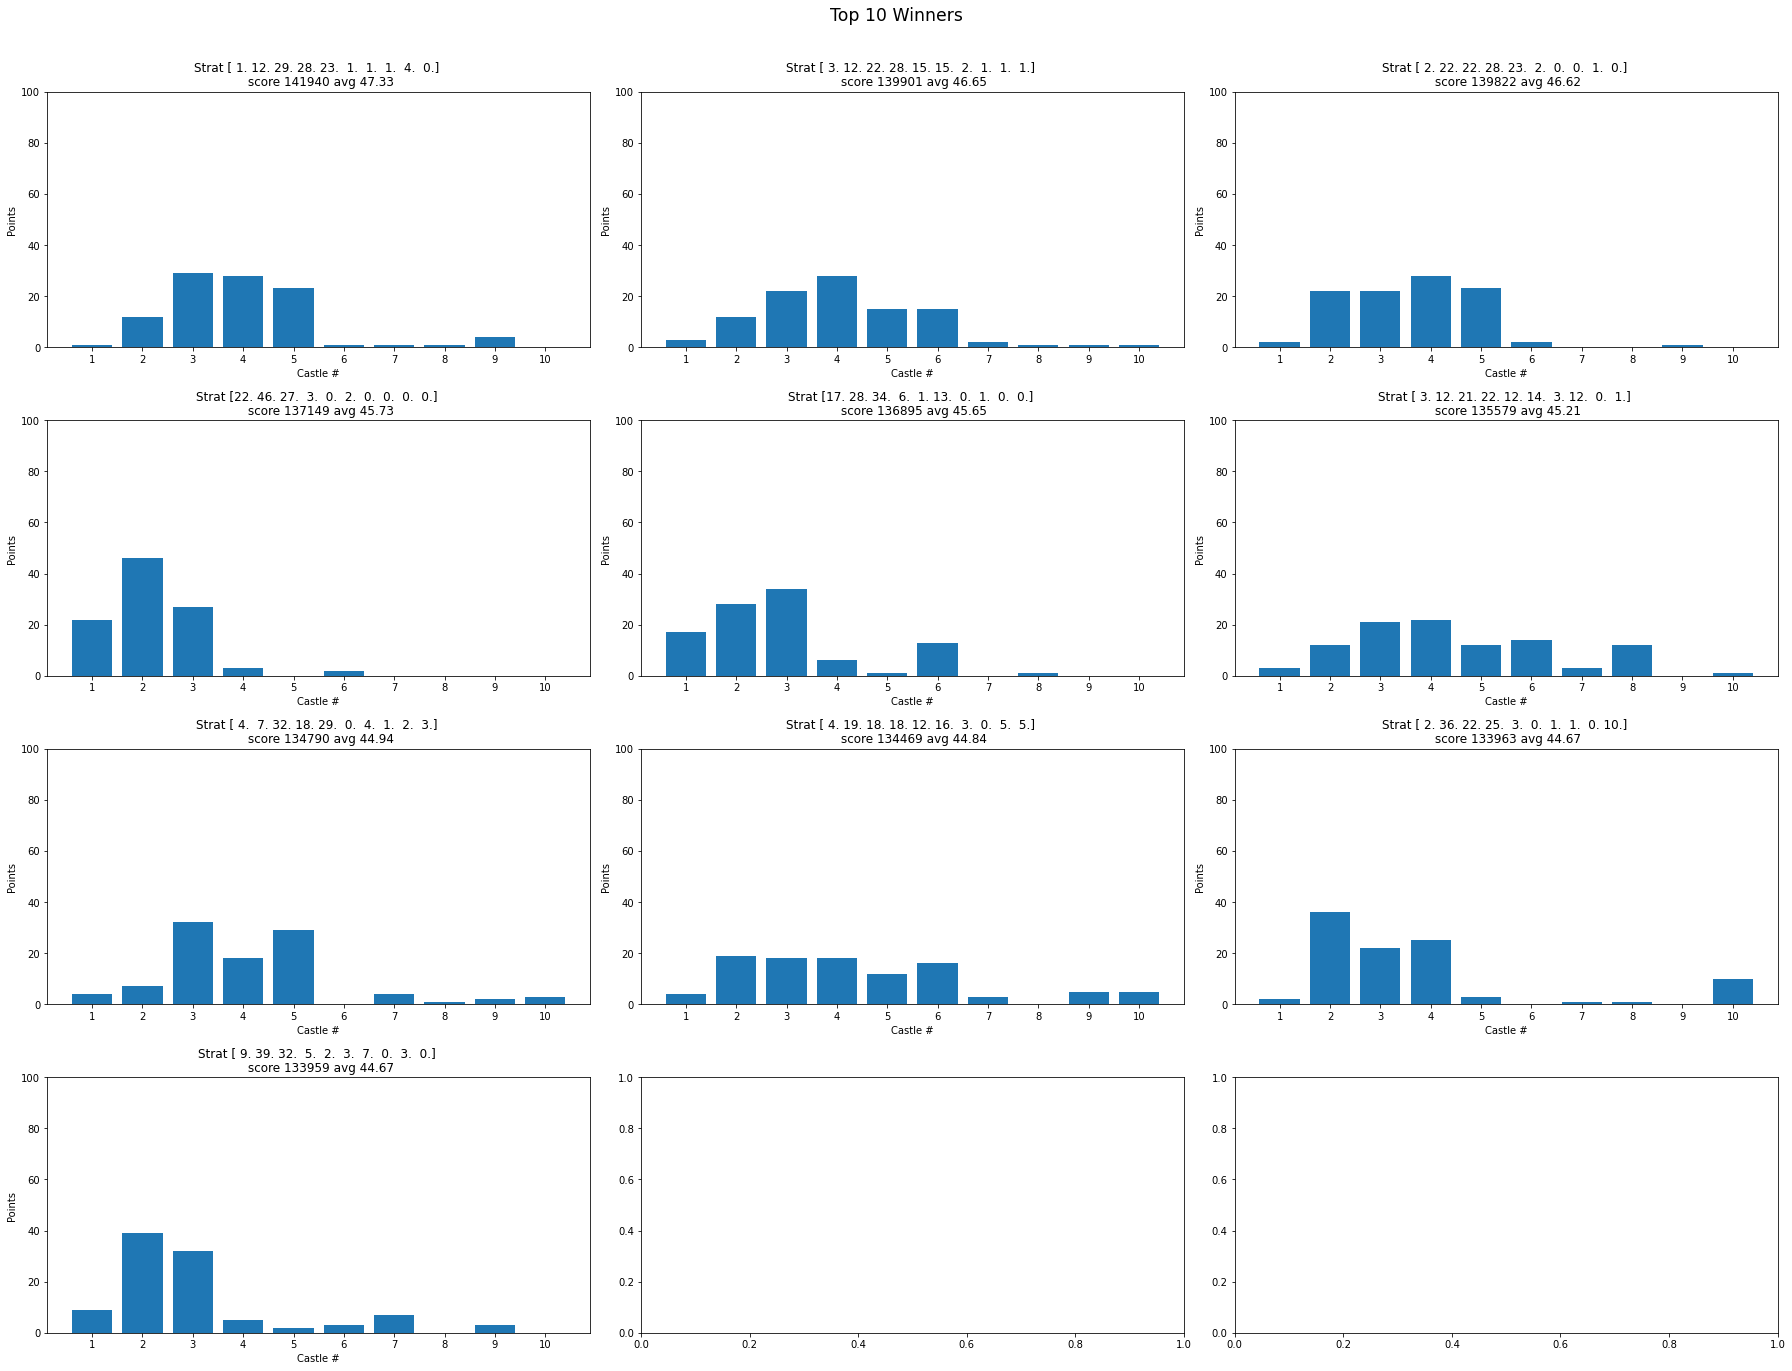

In [137]:
customStrats = []
game1 = Blotto()
game1.addStratsRandom(3000) #reduced from 10000 for demonstration purposes
game1.runTournament(displayCount=10, rows=4, cols=3, fY=20, fX=25, title='Top 10 Winners')


## 2.4 The Beta Distribution
100 samples are randomly drawn from a beta distribution which returns results in range [0...1]. Each result is interpolated and rounded off (mapped) to an integer value between [0...9] which acts as a frequency tally for the bar graph of castles, then normalised for a total of 100 points. Essentially, I used a histogram to roughly model the beta distribution accounting for 10 castles and the 100 points
maximum. With suitable parameters, such left-skewed strategies are produced, shown in Figure 3(see paper).

(See method ```addStratsBeta(a,b,stratCopies)```)


## 2.5 Comparison with Potential Strategies
Consider the strategies in Figure 4. I chose them because they seemed to be variations of likely strategies chosen by other Jane Streeters. The first one maximises all its points in the first three castles to strike out opposing strategies, winning instantly. Another variation of this strategy (the second graph) maximises castles 3-5. The last graph is Beatrice’s strategy, a good balance of points between all the castles. Additional strategies not shown here can be found in my code submission.

## 2.6 The Next and Final Tournament
Finally, I run a mix of over 30,000 strategies against each other. This mix consists of custom strategies, random strategies, and the beta distribution strategies. I skewed the beta distribution strategies to both the left and right to induce more noise and variation into the tournament population.

iteration progress: 28,188,786.0 / 28,188,786.0 ▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
Done!


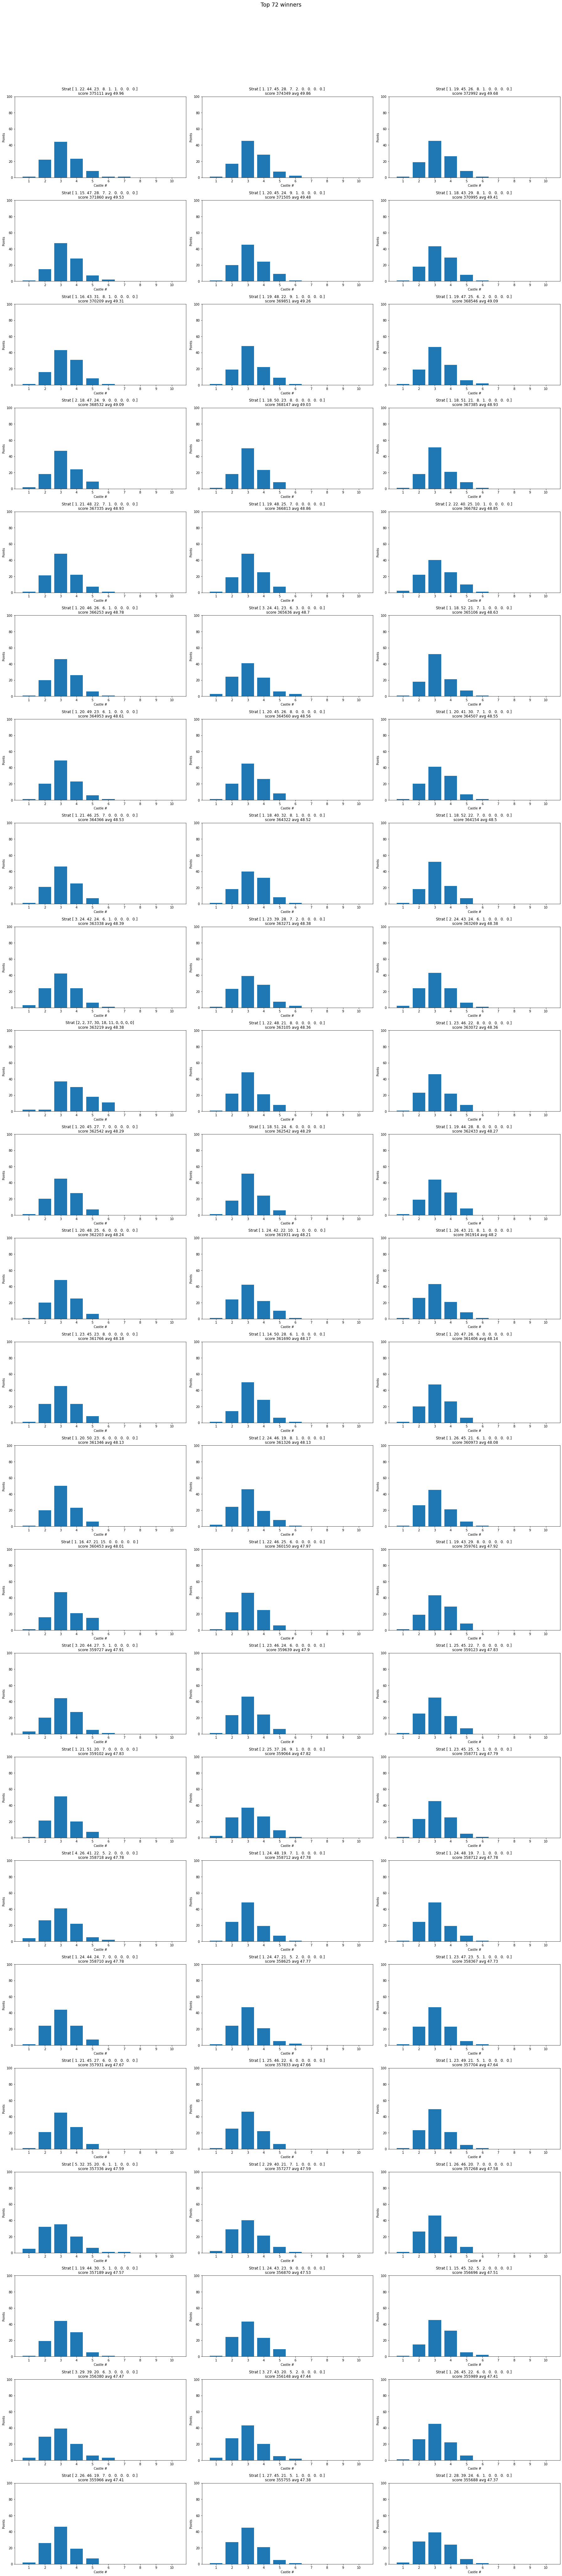

In [138]:
customStrats =[
[33,33,34,0,0,0,0,0,0,0],       #Extreme Front Bias Strategy
[0,0,35,30,30,0,0,0,3,2],       #Extreme Front Bias Counter Strategy
[10 for i in range(10)],        #Alice's Strategy
[5, 10, 15, 17, 8, 5, 5, 15, 18, 2], #Beatrice's Strategy
[0,0,35,30,30,0,0,0,3,2],
[3, 10, 32, 37, 8, 1, 9, 0, 0, 0],
[0, 23, 23, 27, 25, 2, 0, 0, 0, 0],
[2, 2, 37, 30, 18, 11, 0, 0, 0, 0],
[0, 0, 35, 30, 30, 2, 3, 0, 0, 0]
]



game2 = Blotto()
game2.addStratsRandom(stratCopies = 1000) #originally 4000, reduced to 1000 for demonstration purposes
game2.addStratsBeta(a=1,b=1,stratCopies=1000) #originally 4000, reduced to 1000 for demonstration purposes
game2.addStratsBeta(3,12,500) #originally 2000, reduced to 500 for demonstration purposes
game2.addStratsBeta(20,4,500) #etc...
game2.addStratsBeta(4,15,500)
game2.addStratsBeta(22,10,500)
game2.addStratsBeta(10,10,500)
game2.addStratsBeta(3,15,500)
game2.addStratsBeta(10,18,500)
game2.addStratsBeta(5,16,500)
game2.addStratsBeta(2,1,500)
game2.addStratsBeta(19,4,500)
game2.addStratsBeta(21,9,500)



game2.runTournament(displayCount = 72, rows = 24, cols = 3, fY=120, fX=25, title = 'Top 72 winners')

After close to half a billion rounds of playing (just over 30 minutes), we are greeted with the
(relatively superior) best-performing strategy that is [ 2, 19, 43, 26, 8, 2, 0, 0, 0, 0 ]. (May vary in practice when you simulate it here.)
It is interesting to note that all top performers shared a similar shape, and none of the custom
strategies I added made it to the top 100. Repeated tournaments with this strategy against different
populations show that this strategy still performs consistently near the top. The results agree with my
theory that the ideal strategy involves some sort of a skewed distribution. If the ideal strategy were to
be shaped differently, it would have risen to the top ranks. It is very likely that other variations of
distributions and shapes have been created and accounted for in the vast number of generations.